In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
EPOCH = 10

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", 
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [12]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [21]:
for img, label in dataset.take(1):
    print(img.shape, label.shape)


(32, 256, 256, 3) (32,)


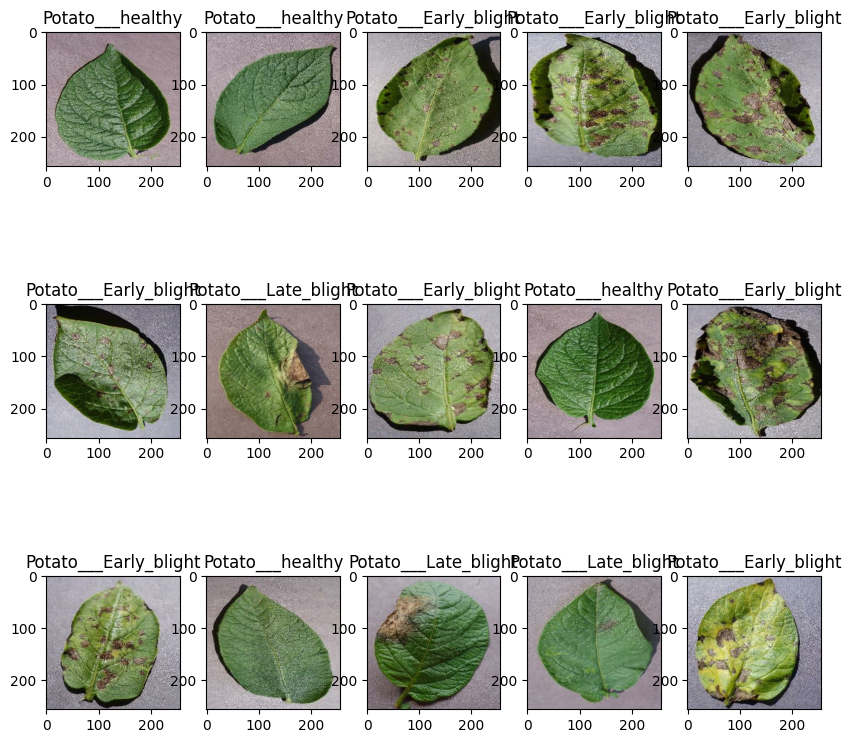

In [29]:
plt.figure(figsize=(10, 10))
for img, label in dataset.take(1):
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])


In [34]:
def dataset_partition(ds, train_split=0.8, validatio_split=0.1, test_split=0.1, shuffle=True):
    if shuffle:
        ds.shuffle(1000, seed=12) #first argument is shuffle size
    train_ds = ds.take(int(len(ds)*train_split)) 
    val_ds = ds.skip(int(len(ds)*train_split)).take(int(len(ds)*validatio_split))
    test_ds = ds.skip(int(len(ds)*train_split)).skip(int(len(ds)*validatio_split))

    return train_ds, val_ds, test_ds

In [35]:
train_ds, val_ds, test_ds = dataset_partition(dataset)

In [36]:
print(len(train_ds), len(val_ds), len(test_ds))

54 6 8
